In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
cols = ("fLength","fWidth","fSize","fConc","fConc1" "fAsym","fM3Long","fM3Trans","fAlpha","fDist","class" ) #names for the colums
df = pd.read_csv("magic04.data",names = cols) # this reads the csv file we passed in and with names = cols we just just get the names for our cols
df.head() # df is just like give me the first 5 things and also df is just data frame

,fLength,fWidth,fSize,fConc,fConc1fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
# df["class"].unique() checking what letters we have in our class

df["class"] = (df["class"] == "g").astype(int) #i mean our computer is not really good at understanding letters so with this we can convert
#g and h to numbers

In [4]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


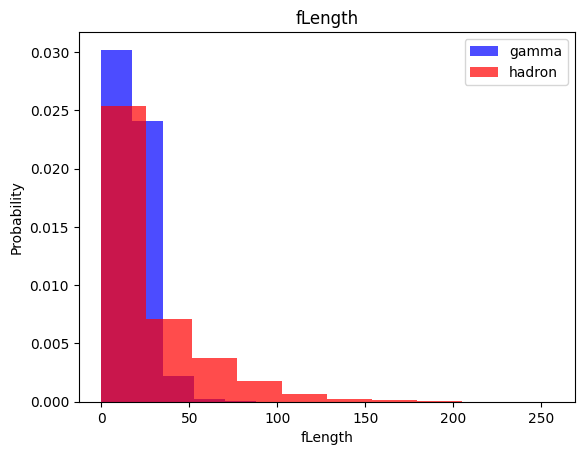

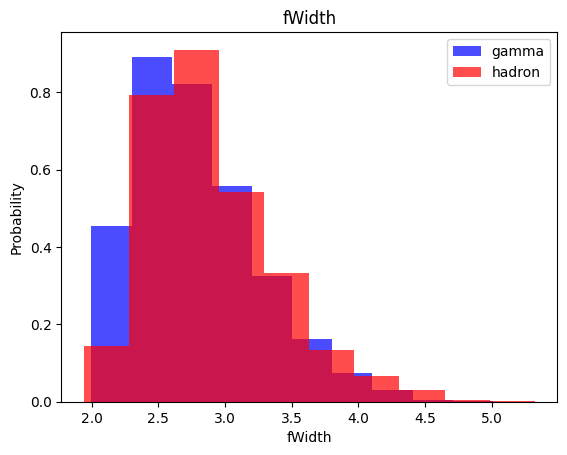

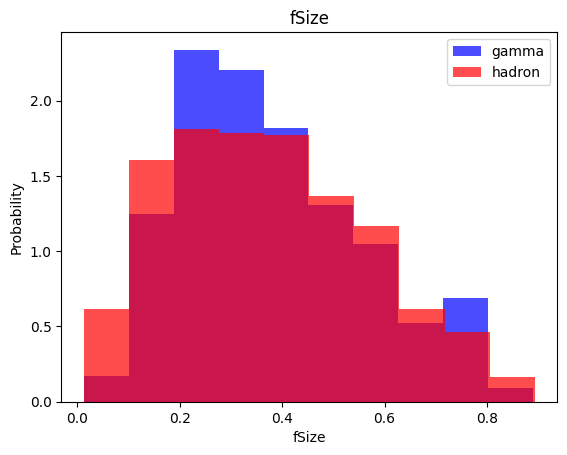

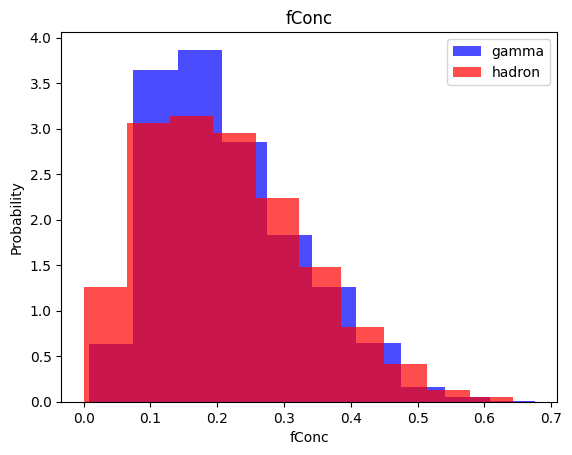

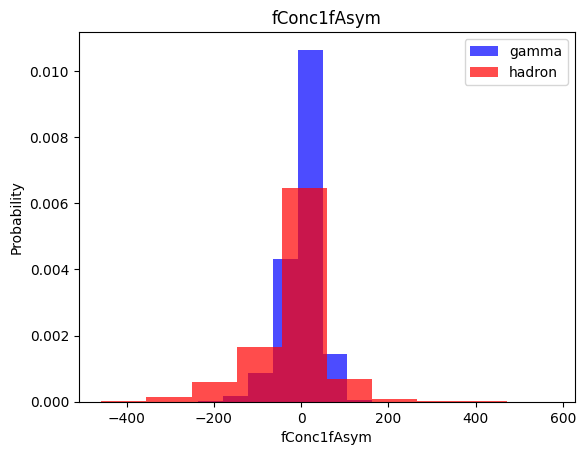

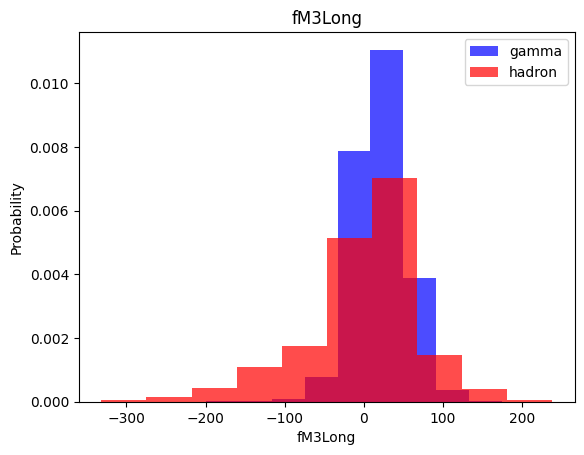

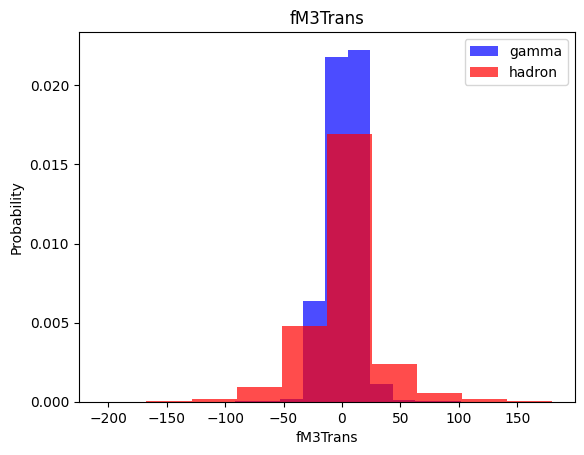

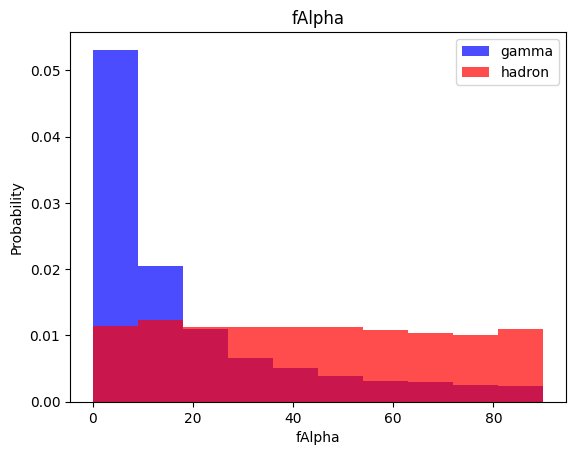

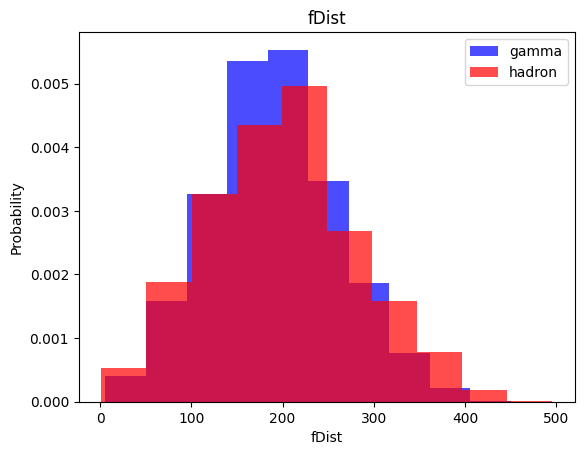

In [5]:
# going through all of the labels # density normalises these distributions
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label],color = 'blue',label = 'gamma',alpha = 0.7 , density = True)
  plt.hist(df[df["class"]==0][label],color = 'red',label = 'hadron',alpha = 0.7 , density = True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

  # alpha: This parameter controls the transparency of the histogram bars.
  # It accepts values between 0 (fully transparent) and 1 (fully opaque).
  # By setting alpha = 0.7, you're making the histogram bars slightly transparent, allowing overlapping bars to be visible.

  # # density : This allows you to compare the shapes of different histograms on the same scale,
  # regardless of the number of data points or bin widths.
  #  It's useful for comparing distributions without being biased by differences in sample size or binning.

  #ok this ended up creating a graph for each feature that's great

Creating our train , validation and test datasets

In [6]:
train, valid, test = np.split(df.sample(frac=1).reset_index(drop=True), [int(0.6*len(df)), int(0.8*len(df))])

# #Adding .reset_index(drop=True) before splitting the DataFrame ensures that a
# new index is created, starting from 0 and dropping the existing index.

In [9]:
def scale_dataset(dataframes,oversample = False):
  x = dataframes[dataframes.columns[:-1]].values
  y = dataframes[dataframes.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(x)

  data = np.hstack((X, np.reshape(y,(-1,1)))) # stacking all the arrays together like take the first array and take the second array and stack them together

  if oversample:
    ros = RandomOverSampler()
    X,y = ros.fit_resample(X,y) # this will take whatever is present in less quantity and make more of it i mean it will increase the data

  return data,X,y
  # x is two dimensional
  # y is one dimensional
  # we made our y a 2d array


dataframes.columns[:-1]: This code is slicing the columns attribute of the DataFrame dataframes. The [:-1] part means "from the beginning up to (but not including) the last element." So, it selects all columns except the last one.

dataframes.columns[-1]: This code is accessing the last element of the columns attribute of the DataFrame dataframes. The [-1] part means "the last element."

When we say an algorithm "learns" from data during the fitting process, it essentially means that it's adjusting its internal parameters based on the patterns present in the training data.

"transforming" in machine learning is the process of modifying the data based on what the model learned during the fitting step. It's about applying adjustments to the data to make it more suitable for analysis or prediction

There is a problem here with the sample since gamma has more values than the hadron values so we want to increase the values of hadron so what we do is we oversample the data

In [10]:
train

,fLength,fWidth,fSize,fConc,fConc1fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,82.5347,3.9952,0.0987,0.0531,-224.5150,-188.0320,-59.7038,73.6304,340.5160,0
1,10.0618,2.3953,0.5070,0.2998,-7.9511,-18.1736,-7.7926,8.4360,180.7580,1
2,11.1595,2.9574,0.3331,0.2002,57.3095,30.2313,8.6606,18.0023,220.2140,0
3,6.9094,2.3284,0.5634,0.2981,-14.9803,11.2292,3.9830,36.3830,253.1080,1
4,17.3243,2.6812,0.3937,0.1990,25.6382,19.2247,-12.8677,10.2730,128.9330,1
...,...,...,...,...,...,...,...,...,...,...
11407,10.4400,2.1446,0.7885,0.4839,13.2572,5.6969,10.7694,24.9009,92.3585,1
11408,67.1405,3.1464,0.3583,0.2159,-173.3630,60.0966,66.0630,28.3269,235.4380,0
11409,12.3282,2.4132,0.4893,0.2782,29.3060,15.2402,-3.1753,87.4535,174.1535,0
11410,10.2911,2.4216,0.6288,0.3352,-7.8341,17.4854,-10.8231,26.5390,182.1570,0


In [11]:
print(len(train[train["class"]==1])) #gamma
print(len(train[train["class"]==0])) #hadron

7380
4032


In [12]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)